#### Import necessary modules

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import  Model
from scipy.spatial import distance
from PIL import Image
import pickle
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import matplotlib
import cv2 as cv
import time

#### Download dataset

In [5]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=f8d99f0a1a26b395812c78583adcaf528066bad8452782cf3a95ee490c9541ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-_cg1krzl/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [6]:
!gdown --id 1VdicuemXgiHdHute2S6xg2lgHpye4iZB
!unzip VizWiz.zip
!rm VizWiz.zip

Streaming output truncated to the last 5000 lines.
  inflating: txt/24199.txt           
  inflating: txt/24200.txt           
  inflating: txt/24201.txt           
  inflating: txt/24202.txt           
  inflating: txt/24203.txt           
  inflating: txt/24204.txt           
  inflating: txt/24205.txt           
  inflating: txt/24206.txt           
  inflating: txt/24207.txt           
  inflating: txt/24208.txt           
  inflating: txt/24209.txt           
  inflating: txt/24210.txt           
  inflating: txt/24211.txt           
  inflating: txt/24212.txt           
  inflating: txt/24213.txt           
  inflating: txt/24214.txt           
  inflating: txt/24215.txt           
  inflating: txt/24216.txt           
  inflating: txt/24217.txt           
  inflating: txt/24218.txt           
  inflating: txt/24219.txt           
  inflating: txt/24220.txt           
  inflating: txt/24221.txt           
  inflating: txt/24222.txt           
  inflating: txt/24223.txt           

#### Using VGG-16 to extract features

In [7]:
# Model Defining
def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model

# Image Preprocessing, image to tensor
def image_preprocess(img):
    img = img.resize((224,224)) # VGG16 constraint
    img = img.convert("RGB")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def extract_vector(model, image_path):
    print("Extracting: ", image_path)
    img = Image.open(image_path)
    img_tensor = image_preprocess(img)

    # Features extraction
    vector = model.predict(img_tensor)[0]
    # Vector normalization
    vector = vector / np.linalg.norm(vector)
    return vector

#### Extracting features

In [ ]:
# Model initialization
model = get_extract_model()

data_path = '/content/img'

vectors, paths = [], []

for image_path in os.listdir('img'):
    # Full path of images
    image_path_full = os.path.join(data_path, image_path)
    # Image's feature extraction
    image_vector = extract_vector(model,image_path_full)
    # Store features and path to list
    vectors.append(image_vector)
    paths.append(image_path_full)

# Save feature's file
vector_file = "vectors.pkl"
path_file = "paths.pkl"

pickle.dump(vectors, open(vector_file, "wb"))
pickle.dump(paths, open(path_file, "wb"))

#### Download vectorized dataset (you can pass this step if you have already extracted feature at previous step)

In [9]:
!gdown --id 1Dg4REQFdJYK40bUtenL5jQ6NK1cnCxvi
!unzip data_vectorized.zip
!rm data_vectorized.zip
model = get_extract_model()

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Dg4REQFdJYK40bUtenL5jQ6NK1cnCxvi
To: /content/data_vectorized.zip
100% 29.4M/29.4M [00:00<00:00, 68.6MB/s]
Archive:  data_vectorized.zip
  inflating: paths.pkl               
  inflating: vectors.pkl             


#### Query

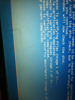

In [10]:
img_query = '/content/img/23455.png'
Image.open(img_query)

Extracting:  /content/img/23455.png


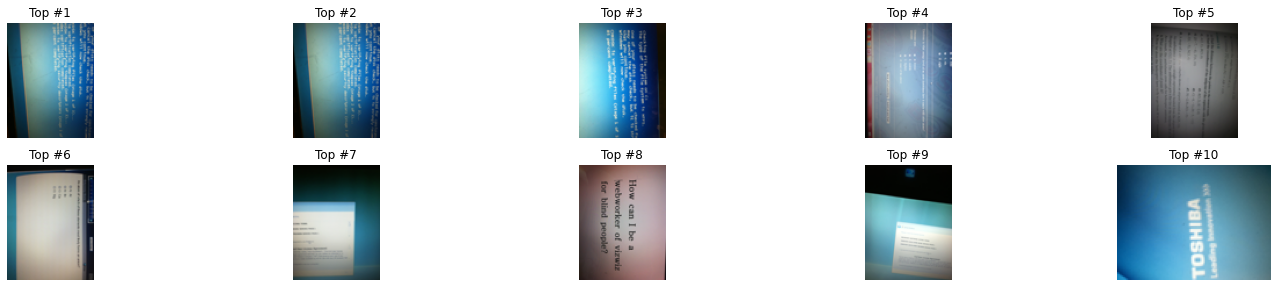

In [11]:
# Query image features extraction
search_vector = extract_vector(model, img_query)

vectors = pickle.load(open("vectors.pkl","rb"))
paths = pickle.load(open("paths.pkl","rb"))

# Distance from query's vector to all vector in dataset
distance = np.linalg.norm(vectors - search_vector, axis=1)

K = 10 # Return top K image same as query image 
ids = np.argsort(distance)[:K]

nearest_image = [(paths[id], distance[id]) for id in ids]

axes = []
grid_size = int(math.sqrt(K))
fig = plt.figure(figsize=(20,10))


for id in range(K):
    draw_image = nearest_image[id]
    # axes.append(fig.add_subplot(grid_size, grid_size, id+1))
    axes.append(fig.add_subplot(5, 5, id+1))


    # axes[-1].set_title(draw_image[1])
    # axes[-1].set_title(draw_image[0].split('/')[-1] + f' ({draw_image[1]})')
    axes[-1].set_title(f'Top #{id+1}')

    plt.axis('off')
    plt.imshow(Image.open(draw_image[0]))

fig.tight_layout()
plt.show()